#Correlation Coefficient
- statistical measure of strencgh of relationship between the relative movements of 2 variables
- number that quantifies a type of correlation and dependence
- "Statistical relationships between dependent nd independent variables (data)"

y = ax + b


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import torch

Instructions for updating:
non-resource variables are not supported in the long term


#Create a dataframe

In [3]:
df = pd.DataFrame([{'X': 1, 'Y': 1},
                  {'X': 2, 'Y': 2},
                  {'X': 3, 'Y': 3},
                  {'X': 4, 'Y': 4},
                  {'X': 5, 'Y': 5}])
df

,X,Y
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [4]:
#adding a new column based on multiplying the x and y columns
df['XY'] = df['X'] * df['Y']
df

,X,Y,XY
0,1,1,1
1,2,2,4
2,3,3,9
3,4,4,16
4,5,5,25


In [5]:
#adding a new column based on x column squared
df['X^2'] = df['X']**2
df

,X,Y,XY,X^2
0,1,1,1,1
1,2,2,4,4
2,3,3,9,9
3,4,4,16,16
4,5,5,25,25


In [6]:
#adding a new column based on y column squared
df['Y^2'] = df['Y']**2
df

,X,Y,XY,X^2,Y^2
0,1,1,1,1,1
1,2,2,4,4,4
2,3,3,9,9,9
3,4,4,16,16,16
4,5,5,25,25,25


In [7]:
#adding a sum row
df.loc['SUM'] = df.sum(axis=0)
df

,X,Y,XY,X^2,Y^2
0,1,1,1,1,1
1,2,2,4,4,4
2,3,3,9,9,9
3,4,4,16,16,16
4,5,5,25,25,25
SUM,15,15,55,55,55


In [8]:
#first iloc returns 5 = N
#
r = ((len(df.iloc[0:-1, 0])*df.iloc[-1, 2]) - df.iloc[-1, 0]*df.iloc[-1, 1]) / \
    np.sqrt((len(df.iloc[0: -1, 0])*df.iloc[-1, 3] - np.power(df.iloc[-1, 0], 2)) * \
    (len(df.iloc[:-1, 0])*df.iloc[-1, 4]-np.power(df.iloc[-1, 1], 2)))

print("r value: ", r)

r value:  1.0


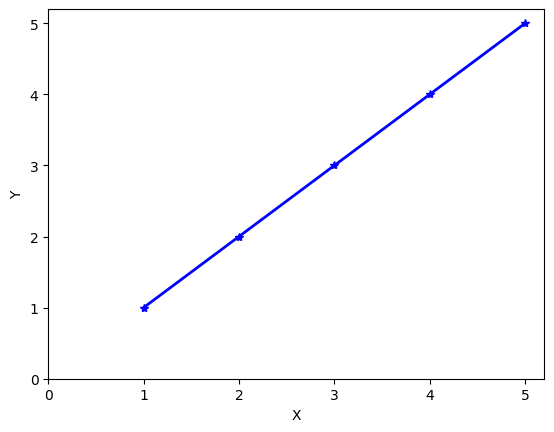

In [9]:
#TO DRAW CHART
import matplotlib.pyplot as plp

#c stands for color

plp.plot(df.iloc[0:-1, 0], df.iloc[0:-1, 1], c="Blue", marker="*", linewidth=2)
plp.plot()

#changing scale
#plp.xticks(1,2,3,4,5)
#plp.yticks(1,2,3,4,5)

#changing scale using np
plp.xticks(np.arange(0, 6))
plp.yticks(np.arange(0, 6))
plp.xlabel('X')
plp.ylabel('Y')
plp.show()

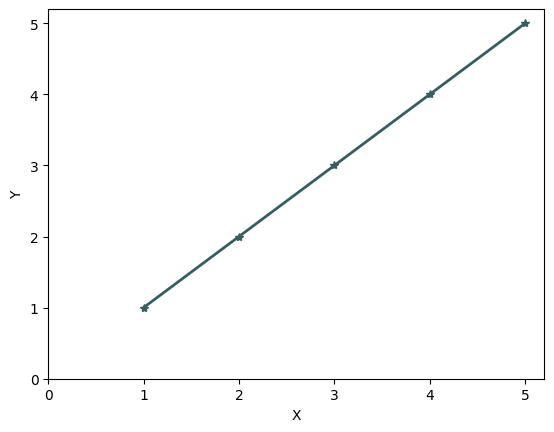

In [10]:
plp.plot(df.iloc[0:-1, 0], df.iloc[0:-1, 1], c="#335f62", marker="*", linewidth=2)

#changing scale using np
plp.xticks(np.arange(0, 6))
plp.yticks(np.arange(0, 6))
plp.xlabel('X')
plp.ylabel('Y')
plp.show()

# y = ax + b ------> H(x) = wx + b
H(x) = hypothesis
w = weight
b = bias (variance)
variable = tensors
int -> IntTensor
float -> FloatTensor
long -> LongTensor

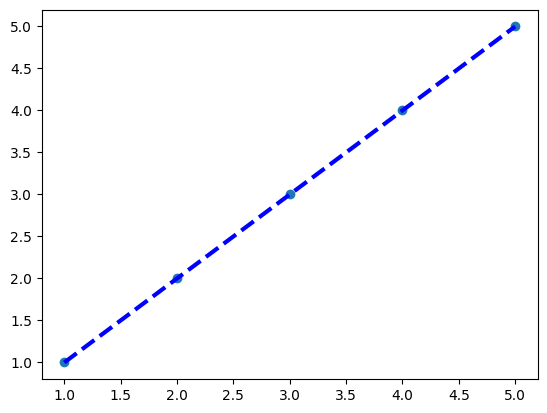

In [11]:
#1: Define dataset
X= df.iloc[0:-1, 0]
Y= df.iloc[0:-1, 1]

#2: create a scatter plot
plp.scatter(X, Y)

#3: calculate an equation for a trendline
z = np.polyfit(X, Y, 1)
t = np.poly1d(z)

#4: add a trendline
plp.plot(X, t(X), c="Blue", linewidth=3, linestyle="--")

# PyTorch Demo

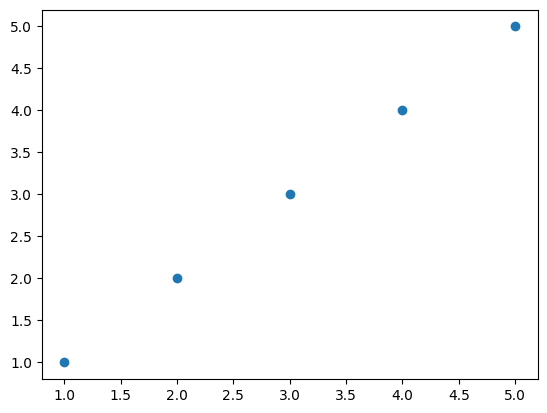

In [12]:
X = torch.LongTensor([[1],
                      [2],
                      [3],
                      [4],
                      [5]]) #2D X data, shape is 5x1

Y = torch.LongTensor([[1],
                      [2],
                      [3],
                      [4],
                      [5]]) #2D Y data, shape is 5x1

plp.scatter(X, Y)

In [13]:
import torch.optim as optim   #this library is to use an optimizer

#1: define the dataset
X = torch.LongTensor([[1],
                      [2],
                      [3],
                      [4],
                      [5]]) #2D X data, shape is 5x1

Y = torch.LongTensor([[1],
                      [2],
                      [3],
                      [4],
                      [5]]) #2D Y data, shape is 5x1

#2: define W and b and initialize them with 0
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#3: optimizer setting
"""
Optimization is the process of adjusting model parameters (weight and bias) to
reduce model error in each training step (epochs)
"""
optimizer = optim.SGD([W, b], lr=0.1)

#4: Model training
for epoch in range(20):
  hypothesis = W * X + b  #this is the model to find the most optimized vals of W and b
  cost = torch.mean((hypothesis - Y)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

#5: display results
if epoch % 5 == 0:
  print("Epoch {:4d} / {} W: {:.3f}, b: {:.3f} Cost: {:.6f}".
        format(epoch, epoch, W.item(), b.item(), cost.item()))

In [17]:
#Step 1: define the dataset
x = [1,2,3,4,5]
y = [1,2,3,4,5]

#Step 2: define global variables
#random, normal distribution, 1D
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#Step 3: Define a hypothesis
hypothesis = W * x + b

#Step 4: Define a loss (cost) function
cost = tf.reduce_mean(tf.square(hypothesis - y))

#Step 5: Define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Step 6: Model training
#Open session for model training

with tf.Session() as sess:
  #Step 6-1: Initialize global variables
  sess.run(tf.global_variables_initializer())

  #Step 6-2: for loop to define epochs
  for epochs in range(5001):
    optim, cost_val, W_val, b_val = sess.run([optimizer, cost, W, b])

    if epochs % 100 == 0:
      print(epochs, cost_val, W_val, b_val)

0 15.503639 [-0.5844486] [1.5156482]
100 0.30466396 [0.6428606] [1.2893866]
200 0.15475956 [0.7454601] [0.9189699]
300 0.07861283 [0.8185847] [0.6549668]
400 0.039932754 [0.87070197] [0.46680677]
500 0.02028451 [0.907847] [0.33270168]
600 0.010303872 [0.93432087] [0.2371225]
700 0.0052340245 [0.95303047] [0.16957487]
800 0.002658715 [0.96663713] [0.12045043]
900 0.0013505376 [0.9762217] [0.08584723]
1000 0.00068603194 [0.9829953] [0.06139244]
1100 0.0003484783 [0.98788047] [0.04375548]
1200 0.00017701641 [0.99139136] [0.03107995]
1300 8.9918656e-05 [0.9938644] [0.02215127]
1400 4.5676377e-05 [0.9956271] [0.01578762]
1500 2.3201497e-05 [0.99688333] [0.0112521]
1600 1.1785992e-05 [0.9977787] [0.0080196]
1700 5.987138e-06 [0.9984168] [0.00571576]
1800 3.0412284e-06 [0.9988716] [0.00407374]
1900 1.544908e-06 [0.99919575] [0.00290347]
2000 7.8485283e-07 [0.99942684] [0.00206945]
2100 3.9876127e-07 [0.99959004] [0.00148006]
2200 2.0260515e-07 [0.9997078] [0.00105497]
2300 1.0291973e-07 [0.99

In [19]:
print("Cost: ", format(8.9244167e-13, 'f'))
print("Bias: ", format(1.9669587e-06, 'f'))

Cost:  0.000000
Bias:  0.000002


# SciKit-Learn library Demo

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
df = pd.DataFrame([{'X': 1, 'Y': 1},
                  {'X': 2, 'Y': 2},
                  {'X': 3, 'Y': 3},
                  {'X': 4, 'Y': 4},
                  {'X': 5, 'Y': 5}])
df

,X,Y
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [25]:
x = df["X"]
y = df["Y"]
lr = LinearRegression()
lr.fit(x.values.reshape(5, 1), y)

LinearRegression()

In [26]:
lr.predict([[8]])

array([8.])

In [27]:
#check weight value
lr.coef_

array([1.])

In [28]:
#check bias
lr.intercept_

0.0

In [31]:
y_pred = lr.predict(x.values.reshape(5, 1))
print("MSE score: ", mean_squared_error(y, y_pred))

MSE score:  0.0


In [ ]:
plt.plot(x,y, marker=)
plt.plot(x, lr.predict(x.values.reshape(5,1)))
plt.show()